# 信号处理仿真与应用 - 数字和模拟滤波器 - 数字滤波

## bandpass

#### 音调的带通滤波

**和MATLAB波形一致**

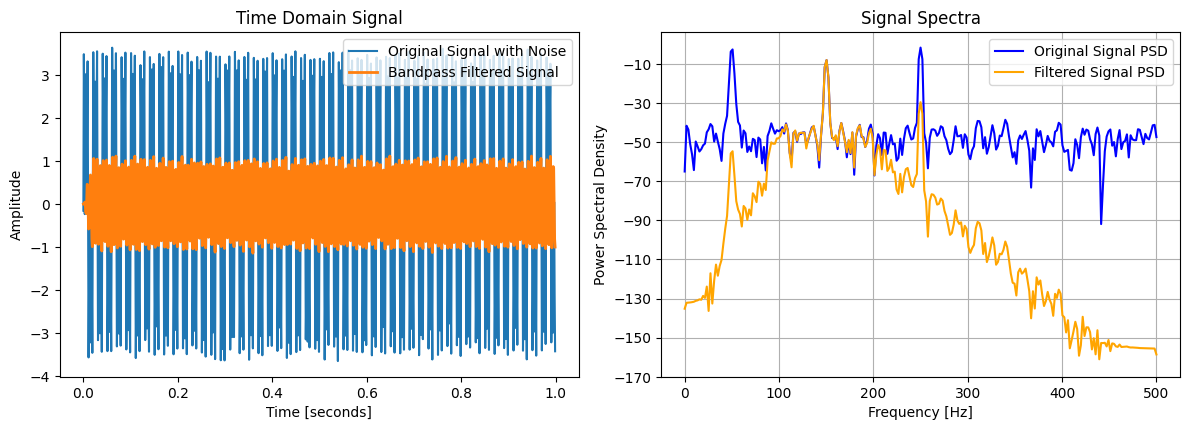

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 设置采样频率和时间向量
fs = 1000
t = np.arange(0, 1, 1/fs)

# 生成信号
frequencies = np.array([50, 150, 250])
amplitudes = np.array([2, 1, 2])
signal = (amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t) +
          amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * t) +
          amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * t))

# 添加高斯白噪声
noise = np.random.randn(len(t)) / 10
x = signal + noise

# 设计带通滤波器
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# 应用带通滤波器
filtered_signal = bandpass_filter(x, 100, 200, fs, order=5)

# 绘制原始信号和滤波信号
plt.figure(figsize=(12, 8))

# 绘制时域信号
plt.subplot(2, 2, 1)  # 改为2行2列的第1个位置
plt.plot(t, x, label='Original Signal with Noise')
plt.plot(t, filtered_signal, label='Bandpass Filtered Signal', linewidth=2)
plt.title('Time Domain Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

# 绘制时域信号的频谱
plt.subplot(2, 2, 2)  # 改为2行2列的第2个位置
plt.psd(x, Fs=fs, NFFT=512, label='Original Signal PSD', color='blue')
plt.psd(filtered_signal, Fs=fs, NFFT=512, label='Filtered Signal PSD', color='orange')
plt.title('Signal Spectra')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()

plt.tight_layout()
plt.show()







**采用文件调度**

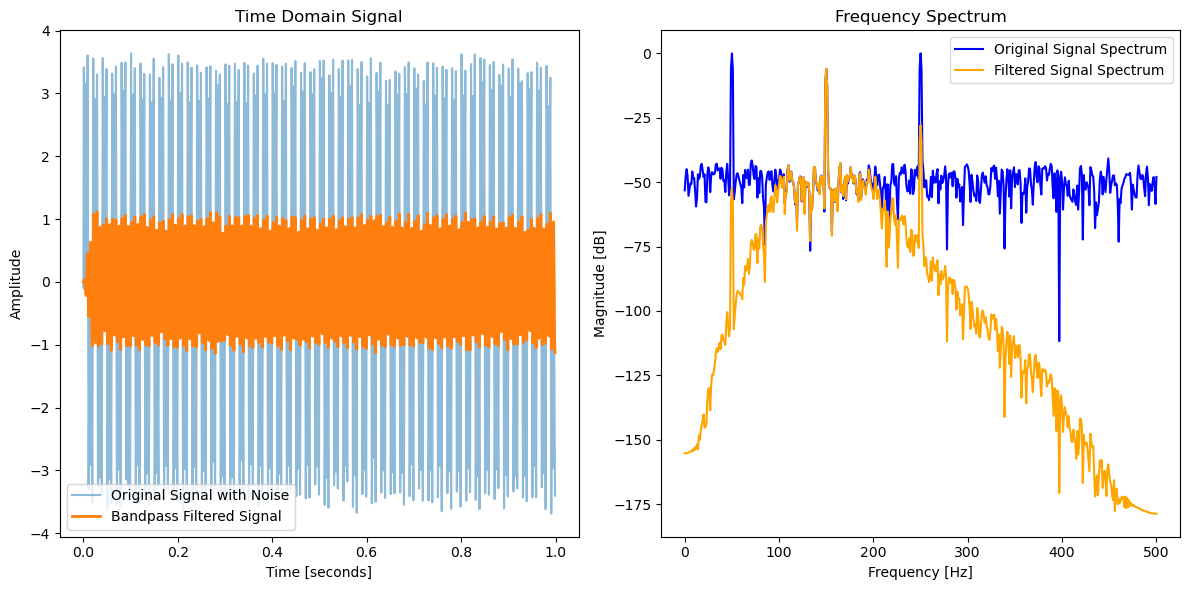

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from bandpass import bandpass

# Define sampling frequency and create time vector
fs = 1000  # Sampling frequency: 1000 Hz
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second

# Generate the signal: contains three tones 50 Hz, 150 Hz, 250 Hz
frequencies = np.array([50, 150, 250])
amplitudes = np.array([2, 1, 2])
signal = np.sum(amplitudes[:, None] * np.sin(2 * np.pi * frequencies[:, None] * t), axis=0)

# Add Gaussian white noise
noise = np.random.randn(len(t)) / 10
x = signal + noise

# Apply bandpass filter
filtered_signal = bandpass(x, [100, 200], fs)

# Save the original and filtered signals to files
np.savetxt('original_signal.csv', x, delimiter=',')
np.savetxt('filtered_signal.csv', filtered_signal, delimiter=',')

# Load signals from files
x_loaded = np.loadtxt('original_signal.csv', delimiter=',')
filtered_signal_loaded = np.loadtxt('filtered_signal.csv', delimiter=',')

# Plotting
plt.figure(figsize=(12, 6))

# Time domain signals
plt.subplot(1, 2, 1)
plt.plot(t, x_loaded, label='Original Signal with Noise', alpha=0.5)
plt.plot(t, filtered_signal_loaded, label='Bandpass Filtered Signal', linewidth=2)
plt.title('Time Domain Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

# Frequency spectrum
plt.subplot(1, 2, 2)
plt.magnitude_spectrum(x_loaded, Fs=fs, scale='dB', color='blue', label='Original Signal Spectrum')
plt.magnitude_spectrum(filtered_signal_loaded, Fs=fs, scale='dB', color='orange', label='Filtered Signal Spectrum')
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()

plt.tight_layout()
plt.show()
